In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc, f1_score, accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve 
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('data/model_data.csv')


data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12581 entries, 0 to 12580
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               12581 non-null  float64
 1   job               12581 non-null  object 
 2   marital           12581 non-null  object 
 3   education         12581 non-null  object 
 4   default           12581 non-null  object 
 5   housing           12581 non-null  object 
 6   loan              12581 non-null  object 
 7   contact           12581 non-null  object 
 8   month             12581 non-null  object 
 9   day_of_week       12581 non-null  object 
 10  campaign          12581 non-null  float64
 11  contacted_before  12581 non-null  object 
 12  previous          12581 non-null  float64
 13  poutcome          12581 non-null  object 
 14  emp.var.rate      12581 non-null  float64
 15  cons.price.idx    12581 non-null  float64
 16  cons.conf.idx     12581 non-null  float6

In [2]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week', 'contacted_before']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data[to_keep]
data_final.columns.values

array(['age', 'campaign', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'subscribed', 'year', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of

In [ ]:
data_X = data_final.loc[:, data_final.columns != 'subscribed']
data_y = data_final.loc[:, data_final.columns == 'subscribed']

data_final_vars=data_final.columns.values.tolist()

y=['subscribed']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

rfe =  RFE(logreg, n_features_to_select=20, step=1)
rfe = rfe.fit(data_X, data_y.values.ravel())
print(len(data_final_vars))
print(rfe.support_)
print(rfe.ranking_)

In [41]:
def filter_strings(string_arr, boolean_arr):
    filtered_arr = []
    for i in range(len(string_arr)):
        if boolean_arr[i]:
            filtered_arr.append(string_arr[i])
    return filtered_arr


filtered_strings = filter_strings(X, rfe.support_.tolist())
print(filtered_strings)

['previous', 'emp.var.rate', 'euribor3m', 'job_blue-collar', 'job_entrepreneur', 'job_management', 'job_retired', 'job_services', 'job_student', 'education_basic.9y', 'default_unknown', 'contact_cellular', 'contact_telephone', 'month_dec', 'month_jul', 'month_jun', 'month_may', 'month_nov', 'day_of_week_fri', 'day_of_week_mon']


In [58]:
#initial cols
#cols=['previous', 'emp.var.rate', 'euribor3m', 'job_blue-collar', 'job_entrepreneur', 'job_management', 'job_retired', 'job_services', 'job_student', 'education_basic.9y', 'default_unknown', 'contact_cellular', 'contact_telephone', 'month_dec', 'month_jul', 'month_jun', 'month_may', 'month_nov', 'day_of_week_fri', 'day_of_week_mon']

#adjusted with p values cols
cols=['previous', 'emp.var.rate', 'euribor3m', 'job_blue-collar','job_retired', 'job_services', 'job_student', 'default_unknown', 'contact_cellular', 'contact_telephone', 'month_jul', 'month_jun', 'month_may','day_of_week_fri', 'day_of_week_mon']
X=data_X[cols]
y=data_y['subscribed']

In [57]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.457282
         Iterations 6
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.149     
Dependent Variable:  subscribed       AIC:              11536.1221
Date:                2023-05-31 10:31 BIC:              11647.7212
No. Observations:    12581            Log-Likelihood:   -5753.1   
Df Model:            14               LL-Null:          -6760.8   
Df Residuals:        12566            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
previous           0.1798   0.0366   4.9087 0.0000  0.1080  0.2516
emp.var.rate       0.2358   0.0464   5.0864 0.0000  0

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [60]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2709  149]
 [ 740  177]]


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      2858
           1       0.54      0.19      0.28       917

    accuracy                           0.76      3775
   macro avg       0.66      0.57      0.57      3775
weighted avg       0.73      0.76      0.72      3775



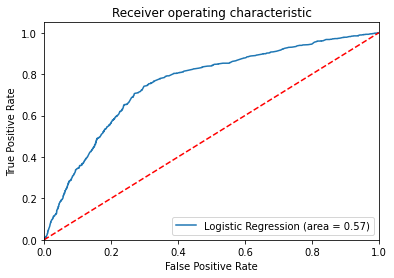

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [66]:
#Resulsts using SMOTE
X = data_final.loc[:, data_final.columns != 'subscribed']
y = data_final.loc[:, data_final.columns == 'subscribed']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['subscribed'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['subscribed']==0]))
print("Number of subscription",len(os_data_y[os_data_y['subscribed']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['subscribed']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['subscribed']==1])/len(os_data_X))

length of oversampled data is  13698
Number of no subscription in oversampled data 6849
Number of subscription 6849
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:
data_X = data_final.loc[:, data_final.columns != 'subscribed']
data_y = data_final.loc[:, data_final.columns == 'subscribed']

data_final_vars=data_final.columns.values.tolist()

y=['subscribed']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1500)

rfe =  RFE(logreg, n_features_to_select=20, step=1)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(len(data_final_vars))
print(rfe.support_)
print(rfe.ranking_)

In [69]:
def filter_strings(string_arr, boolean_arr):
    filtered_arr = []
    for i in range(len(string_arr)):
        if boolean_arr[i]:
            filtered_arr.append(string_arr[i])
    return filtered_arr


filtered_strings = filter_strings(X, rfe.support_.tolist())
print(filtered_strings)

['euribor3m', 'marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']


In [72]:
#initial cols
cols=['euribor3m', 'marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree', 'education_unknown', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']
#adjusted with p values cols
#cols=['previous', 'emp.var.rate', 'euribor3m', 'job_blue-collar','job_retired', 'job_services', 'job_student', 'default_unknown', 'contact_cellular', 'contact_telephone', 'month_jul', 'month_jun', 'month_may','day_of_week_fri', 'day_of_week_mon']
X=data_X[cols]
y=data_y['subscribed']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

In [75]:
######################
cols=['previous', 'emp.var.rate', 'euribor3m', 'job_blue-collar','job_retired', 'job_services', 'job_student', 'default_unknown', 'contact_cellular', 'contact_telephone', 'month_jul', 'month_jun', 'month_may','day_of_week_fri', 'day_of_week_mon']


In [80]:
def LogRegOptimizer(X, y):
    print('**We will optimize the hyper-parameters of a Logistic Regression model using Randomized Search**\n')

    #function to help us display metrics in a percentage format
    def percentage(x):  
        x = round(x*100,2)
        return (str(x) + "%")


    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=1)

    over = SMOTE()
    
    X_train, y_train = over.fit_resample(X_train,y_train)

    grid_params = {'C' : [0.001,.009,0.01,.09,1,5,10,25], 
                    'penalty' : ["l1","l2", "elasticnet"],
                    'solver': ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
    }

    logreg=LogisticRegression()
    logreg_cv=RandomizedSearchCV(logreg, grid_params, cv = 10 , verbose = True, n_jobs= -1, scoring = "roc_auc")  #randomized search as opposed to gridsearch, to improve run time
    logreg_cv.fit(X_train,y_train)
    
    
    y_pred = logreg_cv.predict(X_test)


    print("----------------------------------- Predict proba-----------------------------------")

    
    print(logreg_cv.best_estimator_.predict_proba(X_test)[:,0])
    print("----------------------------------- Confusion Matrix-----------------------------------")
    print(confusion_matrix(y_test, y_pred))

    print("--------------------------------- Classification Report---------------------------------")
    print(classification_report(y_test, y_pred))


    print("-----------------------------------------Metrics----------------------------------------\n")
    print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
    print("ROC AUC SCORE:" + str(roc_auc_score(y_test, y_pred)))
    print("Gini (Somer's D) coefficient:" + str((roc_auc_score(y_test, y_pred)*2-1)))
    print('Accuracy Score : ' + percentage(accuracy_score(y_test,y_pred)))
    print('Precision Score : ' + percentage(precision_score(y_test,y_pred)))
    print('Recall Score : ' + percentage(recall_score(y_test,y_pred)))
    print('F1 Score : ' + percentage(f1_score(y_test,y_pred)))

    # get the values required to plot a ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # plot the ROC curve
    plt.plot(fpr, tpr)
    # plot a secondary diagonal line, to plot randomness of model
    plt.plot(fpr, fpr, linestyle = '--', color = 'k')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')

**We will optimize the hyper-parameters of a Logistic Regression model using Randomized Search**

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\wyver\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\wyver\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\wyver\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1104, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

-------------------------------------------------------------

----------------------------------- Predict proba-----------------------------------
[0.47296216 0.72689835 0.62456588 ... 0.77051159 0.9160433  0.81708877]
----------------------------------- Confusion Matrix-----------------------------------
[[1846  604]
 [ 220  476]]
--------------------------------- Classification Report---------------------------------
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      2450
           1       0.44      0.68      0.54       696

    accuracy                           0.74      3146
   macro avg       0.67      0.72      0.68      3146
weighted avg       0.79      0.74      0.76      3146

-----------------------------------------Metrics----------------------------------------

tuned hyperparameters :(best parameters)  {'solver': 'saga', 'penalty': 'l2', 'C': 10}
ROC AUC SCORE:0.7186887168660568
Gini (Somer's D) coefficient:0.4373774337321137
Accuracy Score : 73.81%
Precision Score : 44.07%
Recal

C:\Users\wyver\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


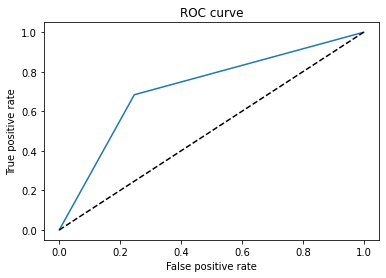

In [81]:
LogRegOptimizer(X = data_final[cols], y = data_final.subscribed)